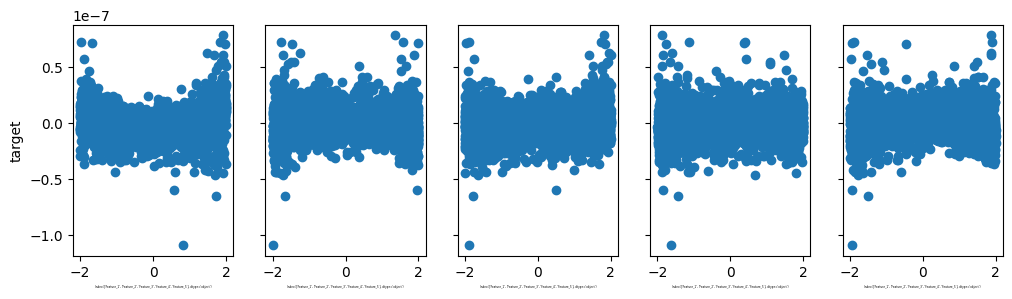

In [ ]:
import os
import pandas as pd

import copy, math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('polynomial_regression_train.xlsx')


X_train = df.iloc[1:4700,1:6]
y_train = df.iloc[1:4700,6]


#plotting the target value and feature to get an idea of whether we need to normalise the given data or not


X_features = df.columns[1:6]


fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(5):
    ax[i].scatter(X_train.iloc[:,i],y_train)
    ax[i].set_xlabel(X_features, size =2)
ax[0].set_ylabel("target")
plt.show()






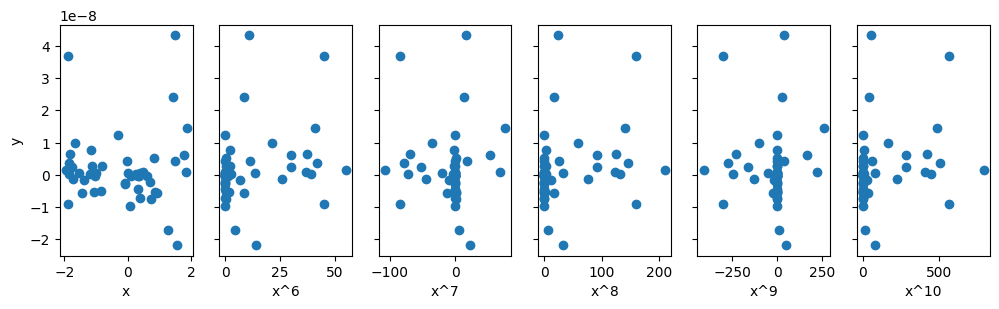

In [ ]:
#plotting the graph for degree upto 6 for all features

# engineer features .

x = X_train.iloc[1:50,2]
y = y_train.iloc[1:50]

X = np.c_[x, x**6, x**7, x**8, x**9, x**10]   #<-- added engineered feature
X_features = ['x','x^6','x^7','x^8','x^9','x^10']

fig,ax=plt.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [ ]:
def generate_power_combinations(num_features, degree):
    combinations = []
    # Example for 3 features:
    for power1 in range(degree + 1):  # Outer loop for feature 1
        for power2 in range(degree + 1):  # Nested loop for feature 2
            for power3 in range(degree + 1):  # Nested loop for feature 3
               for power4 in range(degree + 1):  # Nested loop for feature 4
                 for power5 in range(degree + 1):   # Nested loop for feature 5
                   if sum([power1, power2, power3,power4, power5]) <= degree:  # Check total power
                     combinations.append((power1, power2, power3,power4,power5))  # Store valid combination
    return combinations

combinations = generate_power_combinations(5, 6)
print(combinations)
print(len(combinations))

# ... (your existing code for loading data and generating combinations) ...

def generate_polynomial_features(X, combinations):
    """
    Generates polynomial features by raising the original features
    to the powers specified in the combinations.

    Args:
        X: The original feature matrix (DataFrame or NumPy array).
        combinations: A list of power combinations generated by
                      generate_power_combinations.

    Returns:
        A NumPy array containing the polynomial features.
    """

    num_samples = X.shape[0]
    num_features = len(combinations[0])  # Assuming all combinations have same length
    polynomial_features = np.ones((num_samples, len(combinations)))  # Initialize with 1s for the intercept term

    for i, combination in enumerate(combinations):
        # Iterate through each feature and raise it to the corresponding power
        feature_values = np.ones(num_samples)  # Initialize for each combination
        for j, power in enumerate(combination):
            feature_values *= X.iloc[:, j] ** power  # Raise feature to power and multiply
        polynomial_features[:, i] = feature_values  # Assign to the polynomial feature matrix

    return polynomial_features

# Example usage:
X_poly = generate_polynomial_features(X_train, combinations)


def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = ((np.dot(X, w) + b - y)**2) / (2 * m)                      #scalar
    return cost.sum()

def compute_gradient(X, y, w, b):

    m,n = X.shape           #(number of examples, number of features)
            # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw



def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 4000
alpha = 5.0e-6
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_poly, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train.iloc[i], w_final) + b_final:0.2f}, target value: {y_train.iloc[i]}")






[(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 0, 2), (0, 0, 0, 0, 3), (0, 0, 0, 0, 4), (0, 0, 0, 0, 5), (0, 0, 0, 0, 6), (0, 0, 0, 1, 0), (0, 0, 0, 1, 1), (0, 0, 0, 1, 2), (0, 0, 0, 1, 3), (0, 0, 0, 1, 4), (0, 0, 0, 1, 5), (0, 0, 0, 2, 0), (0, 0, 0, 2, 1), (0, 0, 0, 2, 2), (0, 0, 0, 2, 3), (0, 0, 0, 2, 4), (0, 0, 0, 3, 0), (0, 0, 0, 3, 1), (0, 0, 0, 3, 2), (0, 0, 0, 3, 3), (0, 0, 0, 4, 0), (0, 0, 0, 4, 1), (0, 0, 0, 4, 2), (0, 0, 0, 5, 0), (0, 0, 0, 5, 1), (0, 0, 0, 6, 0), (0, 0, 1, 0, 0), (0, 0, 1, 0, 1), (0, 0, 1, 0, 2), (0, 0, 1, 0, 3), (0, 0, 1, 0, 4), (0, 0, 1, 0, 5), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), (0, 0, 1, 1, 2), (0, 0, 1, 1, 3), (0, 0, 1, 1, 4), (0, 0, 1, 2, 0), (0, 0, 1, 2, 1), (0, 0, 1, 2, 2), (0, 0, 1, 2, 3), (0, 0, 1, 3, 0), (0, 0, 1, 3, 1), (0, 0, 1, 3, 2), (0, 0, 1, 4, 0), (0, 0, 1, 4, 1), (0, 0, 1, 5, 0), (0, 0, 2, 0, 0), (0, 0, 2, 0, 1), (0, 0, 2, 0, 2), (0, 0, 2, 0, 3), (0, 0, 2, 0, 4), (0, 0, 2, 1, 0), (0, 0, 2, 1, 1), (0, 0, 2, 1, 2), (0, 0, 2, 1, 3), (0, 0, 2, 2, 

ValueError: shapes (4699,462) and (5,) not aligned: 462 (dim 1) != 5 (dim 0)

In [ ]:
print(X_poly[1,:])

[ 1.00000000e+00 -2.42808052e-01  5.89557501e-02 -1.43149309e-02
  3.47578048e-03 -8.43947487e-04  2.04917245e-04  4.87685105e-01
 -1.18413870e-01  2.87518412e-02 -6.98117855e-03  1.69508637e-03
 -4.11580619e-04  2.37836761e-01 -5.77486808e-02  1.40218447e-02
 -3.40461679e-03  8.26668372e-04  1.15989446e-01 -2.81631714e-02
  6.83824480e-03 -1.66038090e-03  5.65663251e-02 -1.37347592e-02
  3.33491013e-03  2.75865542e-02 -6.69823749e-03  1.34535516e-02
 -1.65302067e-03  4.01366730e-04 -9.74550738e-05  2.36628766e-05
 -5.74553698e-06  1.39506264e-06 -8.06153560e-04  1.95740576e-04
 -4.75273879e-05  1.15400325e-05 -2.80201280e-06 -3.93149083e-04
  9.54597631e-05 -2.31783991e-05  5.62790194e-06 -1.91732952e-04
  4.65543046e-05 -1.13037600e-05 -9.35053048e-05  2.27038409e-05
 -4.56011444e-05  2.73247734e-06 -6.63467501e-07  1.61095252e-07
 -3.91152242e-08  9.49749140e-09  1.33258850e-06 -3.23563218e-07
  7.85637547e-08 -1.90759122e-08  6.49883562e-07 -1.57796962e-07
  3.83143729e-08  3.16938